# Machine Learning

**About this notebook**
I wrote this notebook to gain a thorough understanding of how different machine learning algorithms work. I find it useful to unravel the algorithms and code them from scratch so I get a very fine sense of what they are doing. Someone else might find this useful too. I will use fruit examples, just because they are fun and easy to understand.

**Credit**
My machine learning knowledge comes from Coursera's machine learning course by Andrew Ng.


# 1. Linear Regression

**Introduction**
James owns a fruit stand at the market and sells bananas of different quality. Some have some brown spots, others are nice and yellow, of perfect quality. Customers pay more for bananas of better quality. 

**The problem**:
James gets a new shipment of bananas and wants to be able to predict the price that he can sell them for based on their quality.

**The data**:
James has data from a 100 bananas that he sold in the past. The bananas were ranked on a scale from 0 (really bad) to 10 (perfect quality), and labeled for the respective price in cents James was able to sell them for.   
- 'X' is the quality of the bananas, and is the feature that we are using to predict y
- 'y' is the price of the bananas.

**Machine learning algorithm**:
In order to solve this problem (predicting the price of bananas according to their quality), we are going to use the **linear regression** algorithm. 

**Formula's:**
In order to predict y (the price of bananas) for x (quality of the banana) we need parameters that gives the best fitted line for the data we have already seen (the training data). The formula for the hypothesized relationship between $X$ and $Y$, the $h_\theta(x)$ is:

(1a)$$h_\theta(x) = \theta_0 + \theta_1 x_1$$

We will use a vectorized implementation, which means we don't have to treat each banana example individually but instead we work with vector multiplications. This means that we set $x_0$ to $1$ so that we can multiply all parameter estimates $\theta$ with all features $X$. (Even though we only have one feature in this example.)

(1b)$$h_\theta(x)= \theta^Tx$$


We want the best fitted line through our points that are scattered on the X and Y axis. In order to understand if our line is a good fit we use the cost function. In short, it calculates the distance from the points to that line. The smaller the sum of all those distances, the better the fit of the line is. So we minimize the cost function to get the best fitted line. The formula for the cost function is:

(2)$$J(\theta)= \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$


So we have a hypothesis and a way of checking whether the line we predict is a good fit. But how do we find the parameters $\theta$ to get the formula of the predicted line? We use gradient descent. We use the derivatives to get a direction to step towards so that we are minimizing the cost function. The formula for gradient descent is:


(3)$$\theta_j:=\theta_j - \alpha\frac{\delta}{\delta\theta_j}J(\theta)$$


We implement 'batch gradient descent', which means that it looks at all training examples simultaneously to update the parameters $\theta$. This is a less costly implementation than to look through each example one by one. What we will do is:

Repeat until convergence:

(4)$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$


In [51]:
# The libraries we need
import numpy as np
import matplotlib.pyplot as plt

In [52]:
X1 = np.sort(np.random.rand(100, 1)*10, axis=0) # initialize X array ; a feature of interest
y = X1 + np.random.rand(100, 1)*5 # initalize Y array ; the labels for X 
print('The shape of X = {}'.format(X1.shape))
print('The shape of y = {}'.format(y.shape))

The shape of X = (100, 1)
The shape of y = (100, 1)


In [53]:
# normalize X so that the mean is 0 and the standard deviation 1. 
# It's not really necessary here but good practice.
# This function normalizes the entire X array.

def normalize(X):
    
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    mu = np.mean(X)
    sigma = np.std(X)
    m = X.shape[0]
    mu_matrix = np.ones((m,1)) * mu
    sigma_matrix = np.ones((m,1)) * sigma
    X = X - mu_matrix
    X = X / sigma_matrix
    
    return(X)

In [54]:
X1_norm = normalize(X1)
print('The mean of X is now: {}'.format(np.mean(X1_norm).astype(int)))
print('The standard deviation of X is now: {}'.format(np.std(X1_norm).astype(int)))

The mean of X is now: 0
The standard deviation of X is now: 1


In [55]:
X0 = np.ones((X1_norm.shape[0],1)) # we set X0 to all zeroes to accomodate the theta0 (intercept) term
X = np.concatenate((X0, X1_norm), axis=1) # combine them into one array

In [56]:
# we want to keep some of the data in order to test whether our model works. 
# So let's split the data in a train set and a test set.
from random import sample

l = 100 #length of data 
f = 75  #number of elements you need
indices = sample(range(l),f)

X_train = X[indices]
y_train = y[indices]

X_test = np.delete(X, indices, axis=0)
y_test = np.delete(y,indices, axis=0)

In [57]:
feats = X_train.shape[1] # how many features do we have
m = y.shape[0] # how many training examples do we have?
print('There are {} features (one is x0, that consist of just ones to accomodate the intercept term theta0).'.format(feats))
print('There are {} training examples.'.format(m))

There are 2 features (one is x0, that consist of just ones to accomodate the intercept term theta0).
There are 100 training examples.


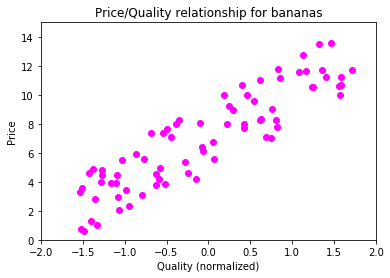

In [58]:
plt.scatter(X_train[:,1],y_train, color='magenta')
plt.axis([-2, 2, 0, 15])
plt.ylabel('Price')
plt.xlabel('Quality (normalized)')
plt.title('Price/Quality relationship for bananas')
plt.show()

In [59]:
def h_x(X, theta):
    h = np.dot(X , theta) # we multiply a matrix with a vector, returns a vector
    return h

In [60]:
def computecost(X, y, theta):
    predicted_y = h_x(X, theta) # use the hypothesis of x function to compute predicted Y values
    error = predicted_y - y # compute the error of the hypothesis
    error_sqrd = np.square(error) # take the squared error
    J = 1/(2*m) * np.sum(error_sqrd) # sum those values
    return J

In [61]:
def gradientdescent(X, y, alpha, iterations):
    
    theta = np.zeros((2,1)) # we start off theta with zeroes
    cost_history = np.zeros((iterations,1))
    
    for i in range(iterations):
        predicted_y = h_x(X,theta)
        error = predicted_y - y
        theta_change = (alpha * (1/m)) * np.dot(X.T , error)
        theta = theta - theta_change
        cost_history[i] = computecost(X,y,theta)

    return(theta, cost_history)

In [67]:
theta, cost_history = gradientdescent(X,y,alpha=0.05, iterations=1000)
print('The values for theta after gradient descent are:\n{}'.format(theta))
print('The initial cost is: {}'.format(cost_history[1]))
print('The end cost is: {}'.format(cost_history[-1]))

The values for theta after gradient descent are:
[[7.1231791 ]
 [3.03173634]]
The initial cost is: [25.50642164]
The end cost is: [1.09929153]


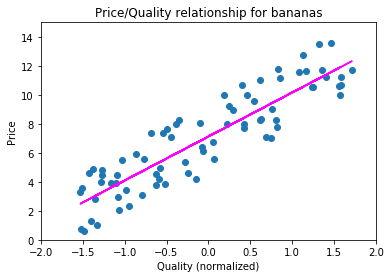

In [68]:
plt.plot(X_train[:,1],np.dot(X_train,theta), color='magenta')
plt.scatter(X_train[:,1], y_train)
plt.axis([-2, 2, 0, 15])
plt.ylabel('Price')
plt.xlabel('Quality (normalized)')
plt.title('Price/Quality relationship for bananas')
plt.show()

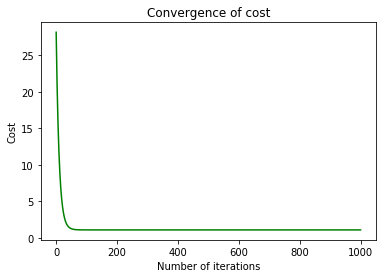

In [69]:
plt.plot(range(len(cost_history)), cost_history, color="green")
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.title('Convergence of cost')
plt.show()

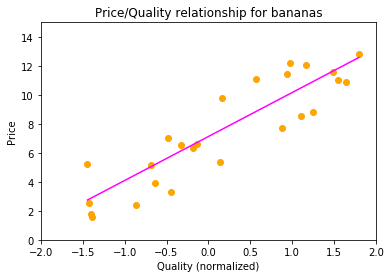

In [70]:
# Let's see how it looks with data that the model did not see before
plt.plot(X_test[:,1],np.dot(X_test,theta), color='magenta')
plt.scatter(X_test[:,1], y_test, color="orange")
plt.axis([-2, 2, 0, 15])
plt.ylabel('Price')
plt.xlabel('Quality (normalized)')
plt.title('Price/Quality relationship for bananas')
plt.show()

In [71]:
# Let's test this more
quality = X_test[10,1] # take some example from the test set
predicted_price = np.dot(X_test[10], theta) # what would be the predicted price?
actual_price = y_test[10] # what is the actual price?
print('For a quality of {} the predicted price is {}'.format(quality, predicted_price))
print('The actual price is {}'.format(actual_price))

For a quality of -0.18055341217698 the predicted price is [6.57578876]
The actual price is [6.32904174]
